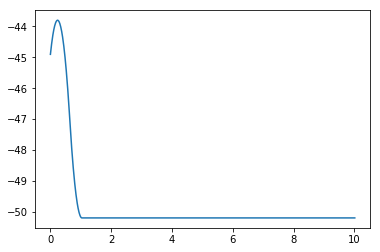

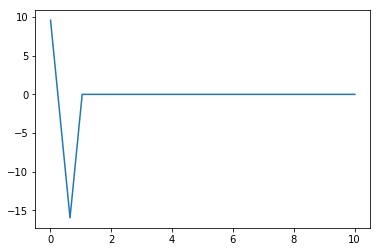

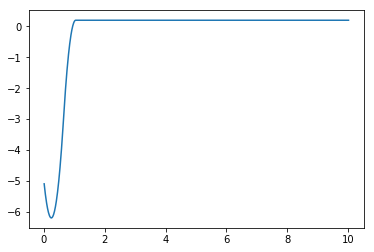

In [1]:
import numpy
from matplotlib import pyplot as plt
import ctre

a = 40.
cruise_v = 40.
x = -45
v = 10.
target = -50.
okerr = 2.

t = 0.
dt = 0.01

ts = []
vs = []
xs = []

while t < 10:
    rdist = 0.5 * v ** 2 / a
    err = target - x
    if abs(err) < okerr:
        if v > 0:
            v -= min(v, dt * a)
        elif v < 0:
            v -= max(v, -dt * a)
    elif okerr <= err < rdist and v > 0:
        v -= dt * a
    elif okerr <= err < rdist and v < 0:
        v += dt * a
    elif -okerr >= err > -rdist and v < 0:
        v += dt * a
    elif -okerr >= err > -rdist and v > 0:
        v -= dt * a
        
    elif err > rdist and v >= 0:
        
        if v > cruise_v:
            v -= dt * a
        elif v < cruise_v:
            v += dt * a
            ####
            #print ('plinko')
    elif err < -rdist and v <= 0:
        if v < -cruise_v:
            v += dt * a
        elif v > -cruise_v:
            v -= dt * a
    elif err > rdist and v < 0:
        v += dt * a
    elif err < -rdist and v > 0:
        v -= dt * a
        
    #print ("t:%f err:%f v:%f x:%f adist:%f" % (t, err, v, x, adist))
    x += dt * v
    t += dt
    
    ts.append(t)
    vs.append(v)
    xs.append(x)

ts = numpy.array(ts)
vs = numpy.array(vs)
xs = numpy.array(xs)

plt.plot(ts, xs)
plt.show()
plt.plot(ts, vs)
plt.show()
plt.plot(ts, target - xs)
plt.show()
    

In [ ]:
# !pip install robotpy-ctre

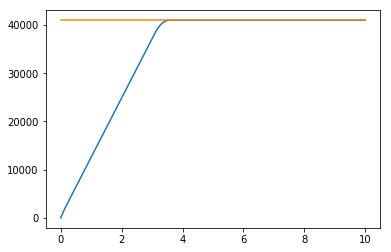

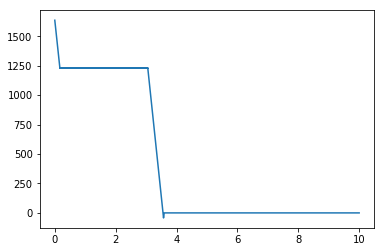

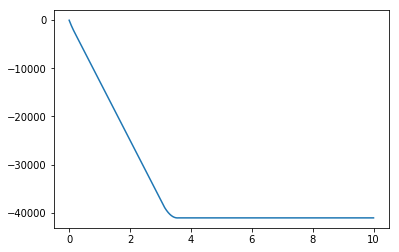

In [18]:
from hal_impl.data import hal_data
talon = ctre.WPI_TalonSRX(1)

talon.configSelectedFeedbackSensor(talon.FeedbackDevice.QuadEncoder, 0, 0)
talon.configMotionCruiseVelocity(int(3 * 4096 * 0.1), 0) # 1 rps
talon.configMotionAcceleration(int(6 * 4096 * 0.1), 0) # 2 rps^2
talon.configAllowableClosedloopError(0, 2, 0)
talon.selectProfileSlot(0, 0)


t = 0.
dt = 0.001 # interval of talon, don't change

ts = []
vs = []
xs = []

# initial position and velocity
hal_data['CAN'][1]['quad_position'] = 0
hal_data['CAN'][1]['quad_velocity'] = int(4 * 409.6)

talon.setDemand(talon.ControlMode.MotionMagic, 10 * 4096, 0)

while t < 10:
    x = talon._motion_magic_next_target()
    t += dt
    
    ts.append(t)
    vs.append(hal_data['CAN'][1]['motionmagic_velocity'])
    xs.append(x)
    
    hal_data['CAN'][1]['quad_position'] = int(x)
    talon._target = x
    #print(ts[-1], vs[-1], xs[-1])

ts = numpy.array(ts)
vs = numpy.array(vs)
xs = numpy.array(xs)

plt.plot(ts, xs)
plt.plot([ts[0], ts[-1]], [hal_data['CAN'][1]['motionmagic_target']] * 2)
plt.show()
plt.plot(ts, vs)
plt.show()
plt.plot(ts, target - xs)
plt.show()
    